In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn  # 머신러닝 학습용 라이브러리
# Font에서 "-"기호가 깨지는걸 방지
plt.rcParams['axes.unicode_minus'] = False

# MatPlotLib 한글.
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.')

D:\Bigdata2020\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\Bigdata2020\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# Example 1: Forge (Binary Classification)
# mglearn에서 forge datasets 가져오기
# 기본은 np.darray 로 되어있는데, pandas로 데이터를 다루기 위해 변환
X, y = mglearn.datasets.make_forge()
forge_data = []
for item_X, item_y in zip(X, y):
    forge_data.append(np.append(item_X, item_y))

# forge datasets를 pandas의 데이터 프레임으로 변환
forge_df = pd.DataFrame(columns=["특성1", "특성2", "분류"], data=forge_data)
forge_df.head()

D:\Bigdata2020\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


,특성1,특성2,분류
0,9.963466,4.596765,1.0
1,11.032954,-0.168167,0.0
2,11.541558,5.211161,1.0
3,8.692890,1.543220,0.0
4,8.106227,4.286960,0.0


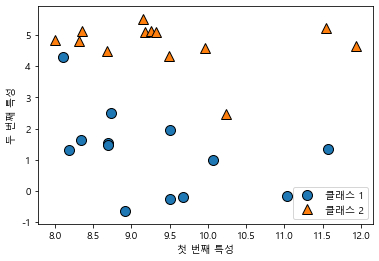

forge 데이터셋의 특성들의 모양 : (26, 2)


In [4]:
mglearn.discrete_scatter(forge_df["특성1"], forge_df["특성2"], forge_df["분류"]) #Parameter : x축 데이터, y축 데이터, 사용할 분류
plt.legend(["클래스 1", "클래스 2"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
plt.show()

print("forge 데이터셋의 특성들의 모양 : {}".format(forge_df[['특성1','특성2']].shape)) #특성의 모양 확인

In [5]:
# Example 2: Wave [저차원 회귀 알고리즘]
X, y = mglearn.datasets.make_wave(n_samples=40)

wave_data = []

for item_X, item_y in zip(X, y):
    wave_data.append(np.append(item_X, item_y))
    
# forge datasets를 pandas의 데이터 프레임으로 변환
wave_df = pd.DataFrame(columns=["입력 특성", "타깃(응답)"], data=wave_data)
wave_df.head()

,입력 특성,타깃(응답)
0,-0.752759,-0.448221
1,2.704286,0.331226
2,1.391964,0.779321
3,0.591951,0.034979
4,-2.063888,-1.387736


Text(0, 0.5, '타깃')

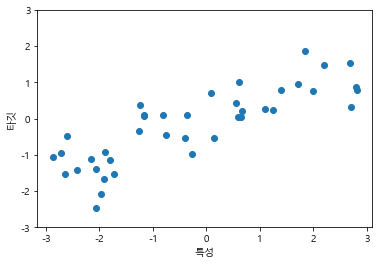

In [8]:
plt.plot(wave_df['입력 특성'], wave_df['타깃(응답)'], 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

# 회귀 설명
# 1) 입력된 특성들을 이용해서
# 2) 타깃 값을 예측

# 이 예제에서 사용한 wave 데이터셋은 매우 특성이 적은 저차원 데이터셋임.

In [11]:
# Example 3: Wisconsin Breast_Cancer (고차원 분류 알고리즘)
# 실제 위스콘신 대학에서 유방암 종야의 임상 데이터를 기록해 놓은 데이터 셋
# 타깃은 유방암 데이터셋 (입력 특성)을 이용해서 각 종양을 구분함.
# breast_cancer 데이터셋은 유방암 데이터셋이 입력 특성이 되고,
# 이에 따른 종양의 종류(타깃)은 다음과 같이 구분됨:
# benign(양성) - 해롭지 않은 종양
# malignant(악성) - 암 종양

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("cancer.keys(): \n{}".format(cancer.keys()))
cancer_features_df = pd.DataFrame(data=cancer.data, columns = cancer.feature_names)
cancer_target_df = pd.DataFrame(data=cancer.target, columns = ["result"])

cancer_features_df.head()
cancer_target_df.head()

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


,result
0,0
1,0
2,0
3,0
4,0


In [16]:
cancer_df = pd.merge(cancer_features_df, cancer_target_df, right_index=True, left_index=True)
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [13]:
print("클래스 별 샘플 개수:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스 별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [14]:
# Example: 보스턴 주택가격 boston, extended_boston [ 고차원 회귀 알고리즘 ]
# 위스콘신 유방암 데이터셋과 마찬가지로 1970년 보스턴 주택 가격을 
# 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 예측 합니다.
from sklearn.datasets import load_boston
boston = load_boston()
print("Data format: {}".format(boston.data.shape))

boston_features_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_target_df = pd.DataFrame(data=boston.target, columns=["result"])

boston_df = pd.merge(boston_features_df, boston_target_df, right_index=True, left_index=True)
boston_df.head()
# 데이터셋의 입력 특성의 갯수는 13개, 데이터셋의 갯수는 506개
# BUT 이 특성이외에 특성끼리 상호작용이 발생하기 때문에 특성끼리 곱하여 
# 의도적으로 확장한 데이터 셋(extended_boston)을 사용

# 예를 들어서 범죄율, 고속도로의 개별 특성 뿐만 아니라 범죄율과 고속도로의 접근성의 상호작용(곱)도 
# 개별적인 특성으로 생각하겠다는 의미.
# 이것처럼 특성을 유도해내는 것을 특성(feature engineering)이라고 함.

Data format: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,result
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))
# 원래 13개의 특성에 2개씩 짝지은 91개의 특성이 추가되어서 촟 104개의 특성이 생김.

X.shape: (506, 104)
